# Solucion Tarea 06 metodos computacionales
## Santiago Andres Orjuela
### 1006508118



# Matrices 

In [202]:
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sympy as sp

## Operaciones Básicas

1. Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
A = matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?



```
abc=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']
num=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']
```








In [75]:
A = np.matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

M = np.matrix([[47,49,-19,257,487],
           [10,-9,63,137,236],
           [79,142,-184,372,536],
           [59,70,-40,332,588]])

In [76]:
mensaje = M@A.I

In [92]:
m = np.round(mensaje.reshape(20),0).astype(int).tolist()[0]
num = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']
ABC = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']
d = dict(zip(num,ABC))

In [93]:
print(m)
M=[]
for i in m:
  M.append(d[str(i)])
print('El mensaje es:',''.join(M))

[1, 18, 5, 27, 25, 15, 21, 27, 8, 1, 22, 9, 14, 7, 27, 6, 21, 14, 27, 27]
El mensaje es: ARE YOU HAVING FUN  


2. Construir un programa que permita realizar la multiplicacion de dos 
matrices. El programa debe establecer si las matrices se pueden multiplicar.

In [165]:
def Matrix_mult(M1, M2):
  M1s=M1.shape[1]
  M2s=M2.shape[0]

  M3= []

  if M1s!=M2s: 
    print('No se puede realizar la multiplicacion')
  else:
    for i in range(M1.shape[0]):
      M3.append([0]*M2.shape[1])
    for i in range (M1.shape[0]):
      for o in range(M2.shape[1]):
        for k in range(M1.shape[1]):
          M3[i][o]+= M1[i][k]*M2[k][o]
    return sp.Matrix(M3)



In [166]:
np.random.seed(1)
M1=np.random.randint(0,10,(7,3))
M2=np.random.randint(0,10,(3,7))
Matrix_mult(M1,M2)

Matrix([
[188, 80, 93, 80, 163, 144, 63],
[ 35,  0, 30, 45,  45,  35, 30],
[124, 55, 48, 34, 101,  93, 33],
[117, 34, 82, 95, 121,  99, 64],
[ 89, 34, 58, 59,  85,  71, 40],
[113, 60, 61, 43,  92,  81, 31],
[139, 17, 49, 75, 141, 126, 70]])

## Regresión lineal: 1D
2. Para los datos generados en el siguiente dataframe  realizar una regresión lineal, empleando  la siguiente ecuación.

$\Theta = (X^T X)^{-1} X^T y$

Los parametros theta se corresponden con la siguiente ecuacion de la recta:

$y = \theta^T X =\theta_0 + \theta_1 x_1 $

```
N = 10
x1 = np.linspace(-1, 1, N)
y = 2*x1 #- 3*x2 + 0.0
df = pd.DataFrame({"Y":y, "X1":x1})

df["ones"] = np.ones(N)

plt.plot(df.X1,df.Y,"ro")

X = np.matrix(df[ ["ones","X1"] ])
np.shape(X)
y = np.array([df["Y"]])
Y  = np.matrix(np.transpose(y))
np.shape(Y)
```

(10, 1)

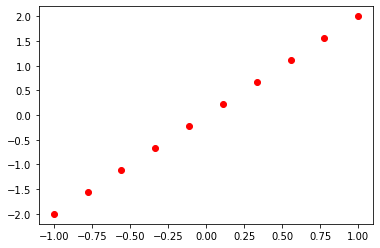

In [168]:
N = 10
x1 = np.linspace(-1, 1, N)
y = 2*x1 #- 3*x2 + 0.0
df = pd.DataFrame({"Y":y, "X1":x1})

df["ones"] = np.ones(N)

plt.plot(df.X1,df.Y,"ro")

X = np.matrix(df[ ["ones","X1"] ])
np.shape(X)
y = np.array([df["Y"]])
Y  = np.matrix(np.transpose(y))
np.shape(Y)

In [169]:
θ = np.array(np.matrix(np.transpose(X)@X).I@np.transpose(X)@Y)
sp.Matrix(θ)

Matrix([
[-5.55111512312578e-17],
[                  2.0]])

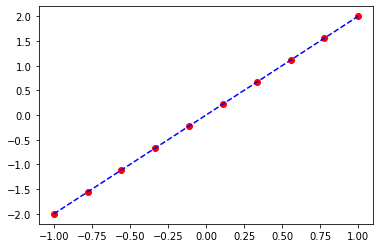

In [170]:
m = θ[1]
b = θ[0]

plt.plot(df.X1,df.Y,"ro")
x2=np.linspace(-1,1,N)
plt.plot(x2,m*x2+b,'b--')
plt.show()


## Regresión lineal: 2D
3. La ecuación anterior puede ser aplicada a sistemas n-dimensionales, como se describie en el siguiente ejercicio. Suponga que se tiene un sistema físico con dos caracteristiacs X1,X2 que se corresponden con un predicción  Y. 

- Encontrar el plano que ajusta los datos, para los datos sinteticos dados mas abajo , a través de:
\begin{equation}
\Theta = (X^T X)^{-1} X^T y$
\end{equation}

- Construya el plano en 3D, donde se evidencia los puntos y el plano de ajustes.

$y = \theta^T X =\theta_0 + \theta_1 X_1+ \theta_2 X_2$


```
N = 200
x1 = np.linspace(-1, 1, N) 
x2 = np.linspace(-1, 1, N)

X1, X2 = np.meshgrid(x1,x2)
Y = 0.2*X1 - 0.5*X2 - 1.0

# Ecuaciones parametricas del mismo plano:
alpha = 2*np.random.random(N)-1
beta  = 2*np.random.random(N)-1
x1 = alpha
x2 = beta
y = 0.2*alpha - 0.5*beta - 1.0

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.scatter(x1, x2, y, color="green")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y1")

```


DataFrame
```
# Regresion bi-lineal
df = pd.DataFrame({"Y":y, "X1":x1,"X2":x2})
df["ones"] = np.ones(N)


y = np.reshape(df.Y.values, (N,1))
X = df[["ones","X1","X2"]].values
X = np.matrix(X)
```

 

Text(0.5, 0, 'Y1')

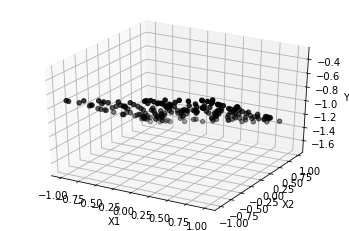

In [171]:
N = 200
x1 = np.linspace(-1, 1, N) 
x2 = np.linspace(-1, 1, N)

X1, X2 = np.meshgrid(x1,x2)
Y = 0.2*X1 - 0.5*X2 - 1.0

# Ecuaciones parametricas del mismo plano:
alpha = 2*np.random.random(N)-1
beta  = 2*np.random.random(N)-1
x1 = alpha
x2 = beta
y = 0.2*alpha - 0.5*beta - 1.0

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.scatter(x1, x2, y, color="black")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y1")

Text(0.5, 0, 'Y1')

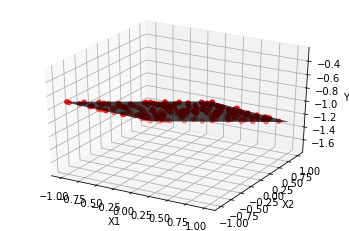

In [172]:
df = pd.DataFrame({"Y":y, "X1":x1,"X2":x2})
df["ones"] = np.ones(N)


y1 = np.reshape(df.Y.values, (N,1))
X = df[["ones","X1","X2"]].values
X = np.matrix(X)

θ1 = ((X.T@X).I)@X.T@y1

alpha

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.scatter(x1, x2, y, color="r")
surf = ax.plot_surface(X1, X2, Y, color="black")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y1")

In [173]:
sp.Matrix(θ1)

Matrix([
[-1.0],
[ 0.2],
[-0.5]])

## Autovalores y autovectores

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 
a) Diagonalize $A$.<br> 

b) Use el hecho de que $f(A) = U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>.
c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> 
d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [244]:
I=sp.Matrix(np.identity(3))
A = np.array([[2,-1,1],[0,3,-1],[2,1,3]])
λ,P = np.linalg.eig(A)
D = (np.diag(λ)).round(0)
sp.Matrix(D)

Matrix([
[4.0,   0,   0],
[  0, 2.0,   0],
[  0,   0, 2.0]])

In [245]:
eD = np.exp(D)
sp.Matrix(eD)

Matrix([
[54.5981500331442,              1.0,              1.0],
[             1.0, 7.38905609893065,              1.0],
[             1.0,              1.0, 7.38905609893065]])

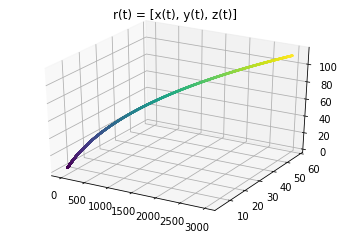

In [246]:
N = 10000

r0, r = np.array([1, 1, 2]), np.zeros((N,3))
t = np.linspace(0,2,N)

for i in range(N): 
  r[i] = np.real(eD**t[i]@r0)
x, y, z = r[:,0], r[:,1],r[:,2]


#3D Plotting
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z, c=z, cmap='viridis', s=2)
ax.set_title('r(t) = [x(t), y(t), z(t)]');